In [1]:
from SYK_fft import Freq2Time, Time2Freq
import numpy as np
import matplotlib.pyplot as plt
#from SYK_conformal import GconfTimeFinite
from matplotlib import rcParams

In [2]:
Nbig = int(1e5)
Jot = 1
#T_list = [0.001*Jot]
#T = T_list[0]
#beta = 1/T
beta = 50
mu  = 0
err = 1e-6
#T = 0.001
T = 1./beta

In [3]:
Gtau = np.ones(Nbig)
#Gtau = GconfTimeFinite(4,Jot,beta,Nbig)
iter = 0
diff = 1
x = 0.5
#narr = np.arange(Nbig)
#omega = (2 * np.arange(-Nbig // 2, Nbig // 2, 1) + 1) * np.pi * T
omega = (2 * np.arange(-Nbig // 2, Nbig // 2, 1) + 1) * np.pi / beta

while(diff>err):
    iter+=1
    diffold = diff
    Goldtau = Gtau 
    Goldomega = Time2Freq(Goldtau,Nbig,beta)
    Sigmatau = (Jot**2) * (Gtau**3)
    Sigmaomega = Time2Freq(Sigmatau,Nbig,beta)
    Gomega = x/(-1j*omega - Sigmaomega) + (1-x)*Goldomega
    Gtau = Freq2Time(Gomega,Nbig,beta)
    diff = (1/Nbig) * np. sqrt(np.sum((np.abs(Gtau-Goldtau))**2))
    if diff>diffold:
        x/=2
    
print("iter = ",iter," , diff = ", diff)
    
    

iter =  8  , diff =  5.574694056720741e-07


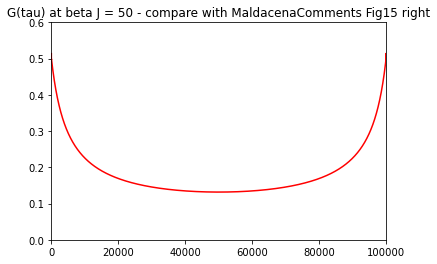

In [4]:
#val = 45000
val = 1
#rcParams['text.usetex'] = False
#plt.rcParams.update({"text.usetex": False,})
#fig, ax = plt.plot(np.real(Gtau[val:-val]),'r',GconfTimeFinite(4,Jot,beta,Nbig)[val:-val],'-.')
ax = plt.plot(np.real(Gtau[val:-val]),'r')
plt.xlim([0,Nbig])
plt.ylim([0,0.6])
plt.title("G(tau) at beta J = 50 - compare with MaldacenaComments Fig15 right")
plt.show()
#plt.plot(np.imag(Gomega))
#plt.show
#plt.plot(GconfTimeFinite(4,Jot,beta,Nbig))
#plt.savefig("GtauSanityCheck.png")